# Megaman: Manifold Learning for Millions of Points

This notebook gives a brief example of using manifold learning to discover hidden structure within a dataset.
We use the [``megaman``](http://mmp2.github.io/megaman/) package, which implements efficient methods for large manifold learning applications.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## The Data

Here we will explore a dataset that is available within the megaman package, using the ``generate_megaman_manifold()`` function:

In [2]:
from megaman.datasets import generate_megaman_manifold

X, color = generate_megaman_manifold(sampling=3)
print(X.shape)

(6696, 8)


The data consists of nearly 7000 points in eight dimensions.
If we look at pairs of dimensions, we can see that there is some sort of regular structure within the data:

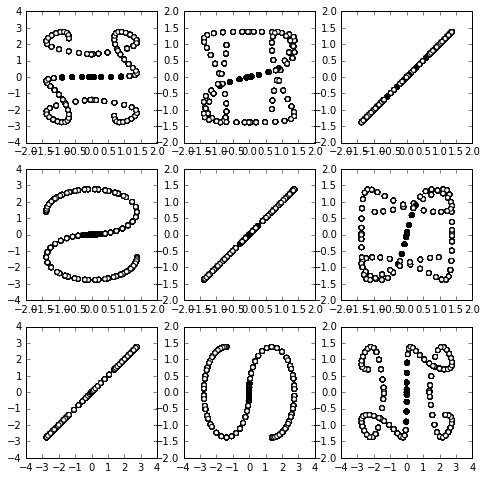

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
for i in range(3):
    for j in range(3):
        ax[2 - i, j].scatter(X[:, i], X[:, j], c=color)

It is obvious that there is some meaningful structure in this data, but it is difficult to determine from these pairwise coordinate exactly what this structure means.
Further, because the structure is very non-linear, classic linear dimensionality reduction algorithms like [Principal Component Analysis]() will generally not be very helpful in understanding the relationships between data points.

## Visualization with Random Projections

One way to proceed is to use random projections of the data: this is akin to what we did above, but we randomly rotate the data in its eight-dimensional space before choosing two coordinates to look at.
The result reveals even more intriguing regular structure within the dataset:

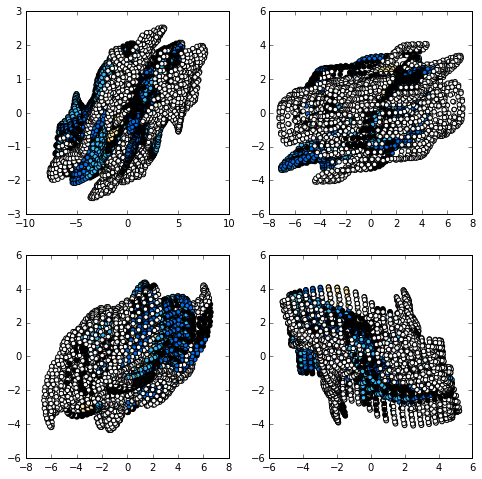

In [4]:
from sklearn.random_projection import GaussianRandomProjection

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for i in range(4):
    X_proj = GaussianRandomProjection(n_components=2, random_state=i).fit_transform(X)
    ax.flat[i].scatter(X_proj[:, 0], X_proj[:, 1], c=color)

## Manifold Learning

So how can we figure out what is *really* going on here?
One approach to a problem like this is known as *manifold learning*.
Manifold Learning is a class of algorithms that finds *non-linear* low-dimensional projections of high-dimensional data, while maximizing some local metric that seeks to preserve relevant structure in the data.
The details of this local metric vary from algorithm to algorithm, and this results in slightly different views of the underlying data.

Here is an example of using the ``megaman`` package to perform a flavor of manifold learning called *Local Tangent Space Alignment*:

In [5]:
from megaman.embedding import LTSA
from megaman.geometry import Geometry

geom = Geometry(adjacency_kwds=dict(n_neighbors=6))
model = LTSA(geom=geom, eigen_solver='arpack', random_state=6)

X_proj = model.fit_transform(X)
print(X_proj.shape)

(6696, 2)


The result is a two-dimensional representation of the original 7000 points.
To see what comes out, we can plot these points as we did above.
We'll plot a gray background so we can see the white points more clearly:

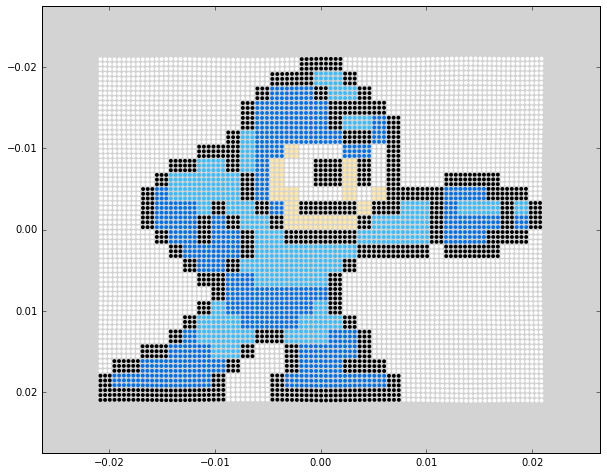

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_axis_bgcolor('lightgray')
ax.scatter(X_proj[:, 1], X_proj[:, 0], c=color, s=15, edgecolor='none')
ax.axis('tight')
ax.invert_yaxis()

Finally, we see what this data was: it was a simple 2D grid of points, twisted and contorted into an eight-dimensional embedded space.
The manifold learning algorithm was able to see through this obscuration of the data, and pull out the result: a pose of the main character from the original [Nintendo Mega Man game](https://en.wikipedia.org/wiki/Mega_Man_%28video_game%29).

This definitely is a contrived example, but manifold learning has been shown to be useful in more realistic datasets as well. I invite you to read through our [paper describing the megaman package](http://arxiv.org/abs/1603.02763) for more information and references.